In [1]:
from pathlib import Path
import requests
from io import BytesIO
from zipfile import ZipFile, BadZipFile

import numpy as np
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
#from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.expand_frame_repr', False)

C:\Users\capil\AppData\Local\Temp\ipykernel_20244\2096208113.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
DATA_STORE = Path('data.h5')

In [2]:
tickers=['AAPL', 'MSFT','JNJ', 'AMZN','XOM', 'JPM', 'LQD', 'SHY','IEF', 'TLT','^GSPC', 
         '^DJI', '^IXIC', 'GC=F', 'CL=F','IWM','FCEL', 'GBPUSD=X', 'JPY=X', 'EURUSD=X']
df=None
for i in tickers:
    df_aux=yf.download(i, 
                start='2000-01-01', 
                end='2023-12-31',
                interval='1d',
                progress=False)
    df_aux=df_aux[['Close']]
    df_aux.rename(columns={"Close":i}, inplace=True)
    df=pd.concat([df,df_aux],axis=1)
df=df.dropna()
df


,AAPL,MSFT,JNJ,AMZN,XOM,JPM,LQD,SHY,IEF,TLT,^GSPC,^DJI,^IXIC,GC=F,CL=F,IWM,FCEL,GBPUSD=X,JPY=X,EURUSD=X
Date,,,,,,,,,,,,,,,,,,,,
2003-12-01,0.387679,25.840000,49.500000,2.732500,36.389999,35.660000,109.389999,81.919998,83.599998,84.239998,1070.119995,9899.049805,1989.819946,402.700012,29.950001,55.430000,1977.119995,1.718597,109.169998,1.196501
2003-12-02,0.384643,25.660000,48.950001,2.696500,36.500000,35.810001,109.690002,82.010002,83.839996,84.599998,1066.619995,9853.639648,1980.069946,403.700012,30.780001,55.345001,1941.119995,1.730313,108.730003,1.208897
2003-12-03,0.375536,25.670000,49.160000,2.575500,36.540001,35.799999,109.500000,81.940002,83.620003,84.260002,1064.729980,9873.419922,1960.250000,403.899994,31.100000,54.349998,1951.199951,1.728101,108.300003,1.212298
2003-12-04,0.377679,26.200001,49.330002,2.590000,37.020000,35.389999,109.589996,82.019997,83.800003,84.449997,1069.719971,9930.820312,1968.800049,403.299988,31.260000,54.474998,1931.040039,1.720697,108.269997,1.208094
2003-12-05,0.372321,25.980000,49.160000,2.578000,36.779999,34.959999,110.730003,82.279999,84.820000,85.800003,1061.500000,9862.679688,1937.819946,406.399994,30.730000,53.799999,1877.760010,1.733102,107.620003,1.218695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,193.600006,374.579987,155.460007,153.419998,101.910004,167.399994,110.099998,81.949997,96.190002,98.480003,4754.629883,37385.968750,14992.969727,2057.100098,73.559998,201.479996,1.650000,1.268499,142.070007,1.100619
2023-12-26,193.050003,374.660004,156.139999,153.410004,102.139999,168.389999,110.330002,81.910004,96.250000,98.760002,4774.750000,37545.328125,15074.570312,2058.199951,75.570000,204.100006,1.760000,1.270487,142.229996,1.102026
2023-12-27,193.149994,374.070007,156.350006,153.339996,101.660004,169.399994,111.360001,82.010002,97.000000,100.510002,4781.580078,37656.519531,15099.179688,2081.899902,74.110001,204.820007,1.780000,1.272718,142.460999,1.104301


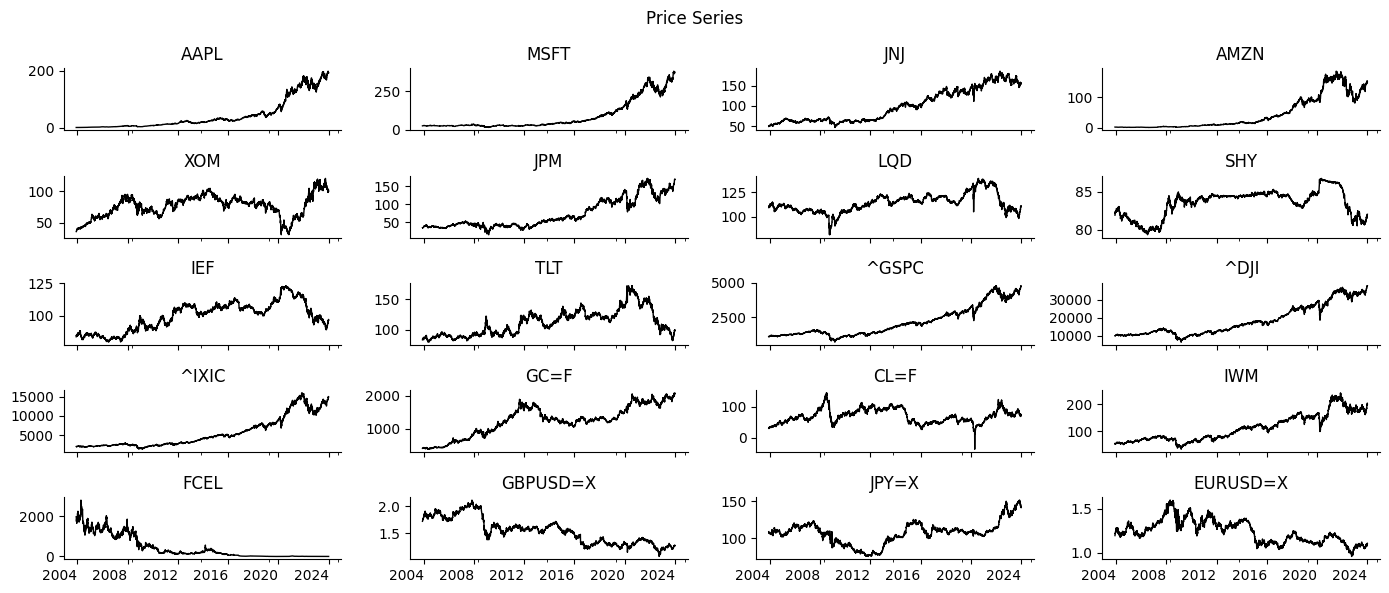

In [3]:
column_names = list(df.columns)
axes = df.plot(subplots=True,
                               figsize=(14, 6),
                               layout=(5, 4),
                               title=column_names,
                               legend=False,
                               rot=0,
                               lw=1, 
                               color='k')
for ax in axes.flatten():
    ax.set_xlabel('')

plt.suptitle('Price Series')
plt.gcf().tight_layout()
sns.despine();
plt.savefig('datos.png')

In [5]:
with pd.HDFStore(DATA_STORE) as store:
    store.put('yfinance/data/real_data', df)

In [6]:
# Determina el tamaño del conjunto de prueba
test_size = 0.2
split_index = int(len(df) * (1 - test_size))

# Divide el DataFrame en entrenamiento y prueba
train_df = df[:split_index]
test_df = df[split_index:]

In [7]:
train_df

,AAPL,MSFT,JNJ,AMZN,XOM,JPM,LQD,SHY,IEF,TLT,^GSPC,^DJI,^IXIC,GC=F,CL=F,IWM,FCEL,GBPUSD=X,JPY=X,EURUSD=X
Date,,,,,,,,,,,,,,,,,,,,
2003-12-01,0.387679,25.840000,49.500000,2.732500,36.389999,35.660000,109.389999,81.919998,83.599998,84.239998,1070.119995,9899.049805,1989.819946,402.700012,29.950001,55.430000,1977.119995,1.718597,109.169998,1.196501
2003-12-02,0.384643,25.660000,48.950001,2.696500,36.500000,35.810001,109.690002,82.010002,83.839996,84.599998,1066.619995,9853.639648,1980.069946,403.700012,30.780001,55.345001,1941.119995,1.730313,108.730003,1.208897
2003-12-03,0.375536,25.670000,49.160000,2.575500,36.540001,35.799999,109.500000,81.940002,83.620003,84.260002,1064.729980,9873.419922,1960.250000,403.899994,31.100000,54.349998,1951.199951,1.728101,108.300003,1.212298
2003-12-04,0.377679,26.200001,49.330002,2.590000,37.020000,35.389999,109.589996,82.019997,83.800003,84.449997,1069.719971,9930.820312,1968.800049,403.299988,31.260000,54.474998,1931.040039,1.720697,108.269997,1.208094
2003-12-05,0.372321,25.980000,49.160000,2.578000,36.779999,34.959999,110.730003,82.279999,84.820000,85.800003,1061.500000,9862.679688,1937.819946,406.399994,30.730000,53.799999,1877.760010,1.733102,107.620003,1.218695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,73.412498,157.699997,145.869995,92.391998,69.779999,139.399994,127.959999,84.629997,110.220001,135.479996,3230.780029,28538.439453,8972.599609,1519.500000,61.060001,165.669998,2.510000,1.311303,108.873001,1.120230
2020-01-02,75.087502,160.619995,145.970001,94.900497,70.900002,141.089996,128.229996,84.669998,110.730003,137.009995,3257.850098,28868.800781,9092.190430,1524.500000,61.180000,165.779999,2.010000,1.325030,108.712997,1.122083
2020-01-03,74.357498,158.619995,144.279999,93.748497,70.330002,138.339996,128.669998,84.739998,111.470001,139.119995,3234.850098,28634.880859,9020.769531,1549.199951,63.049999,165.130005,2.060000,1.315270,108.542999,1.117144


In [8]:
seq_len = 24
n_seq = 20
batch_size = 128

In [9]:
real_train_data = []
for i in range(len(train_df) - seq_len):
    real_train_data.append(np.array(train_df)[i:i + seq_len])
real_train_data=np.array(real_train_data)

In [12]:
real_test_data = []
for i in range(len(test_df) - seq_len):
    real_test_data.append(np.array(test_df)[i:i + seq_len])
real_test_data=np.array(real_test_data)

In [14]:
#np.save('real_train_data_array.npy', real_train_data)
#np.save('real_test_data_array.npy', real_test_data)

In [15]:
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_df).astype(np.float32)
scaled_test_data = scaler.transform(test_df).astype(np.float32)

In [16]:
scaled_real_train_data = []
for i in range(len(train_df) - seq_len):
    scaled_real_train_data.append(scaled_train_data[i:i + seq_len])
scaled_real_train_data=np.array(scaled_real_train_data)

In [19]:
scaled_real_test_data = []
for i in range(len(test_df) - seq_len):
    scaled_real_test_data.append(scaled_test_data[i:i + seq_len])
scaled_real_test_data=np.array(scaled_real_test_data)

In [21]:
#np.save('scaled_real_train_data_array.npy', scaled_real_train_data)
#np.save('scaled_real_test_data_array.npy', scaled_real_test_data)